# lab4 - 集成学习

In [9]:
import warnings


warnings.filterwarnings('ignore')

## Задание 1

Исследуйте зависимость качества классификации от количества классификаторов в ансамбле для алгоритмов бэггинга на наборе данных glass.csv с различными базовыми классификаторами. Постройте графики зависимости качества классификации при различном числе классификаторов, объясните полученные результаты. 

在 glass.csv数据集上，用不同的基本分类器研究分类质量对集合中分类器数量的依赖。绘制不同数量分类器的分类质量的依赖性，解释结果

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


def plot_bagging_ensemble(base_estimator, max_num_estimator, x_train, x_test, y_train, y_test, title):
    """绘制分类器数量和预测得分的关系图"""
    arr_score = []
    arr_num_tesimator = range(1, max_num_estimator)
    for i in arr_num_tesimator:
        ensemble_estimator = BaggingClassifier(base_estimator=base_estimator, n_estimators=i, bootstrap=True, random_state=90102)
        ensemble_estimator.fit(X=x_train, y=y_train)
        score = ensemble_estimator.score(X=x_test, y=y_test)
        arr_score.append(score)

    print('Best score in ensemble with bagging: ', max(arr_score))
    plt.figure(figsize=(40, 20), dpi=40)
    plt.plot(arr_num_tesimator, arr_score, c='b')
    plt.title(title, size=34)
    plt.xlabel('Number of estimator', size=34)
    plt.ylabel('Score', size=34)
    plt.tick_params(labelsize=28)
    plt.show()
    pass


data = pd.read_csv('glass.csv')
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data.iloc[:, -1:], random_state=90102)

Best estimator in KNN:  KNeighborsClassifier(metric='euclidean', n_neighbors=1)
Predict score in KNN: 1.0
Best score in ensemble with bagging:  1.0


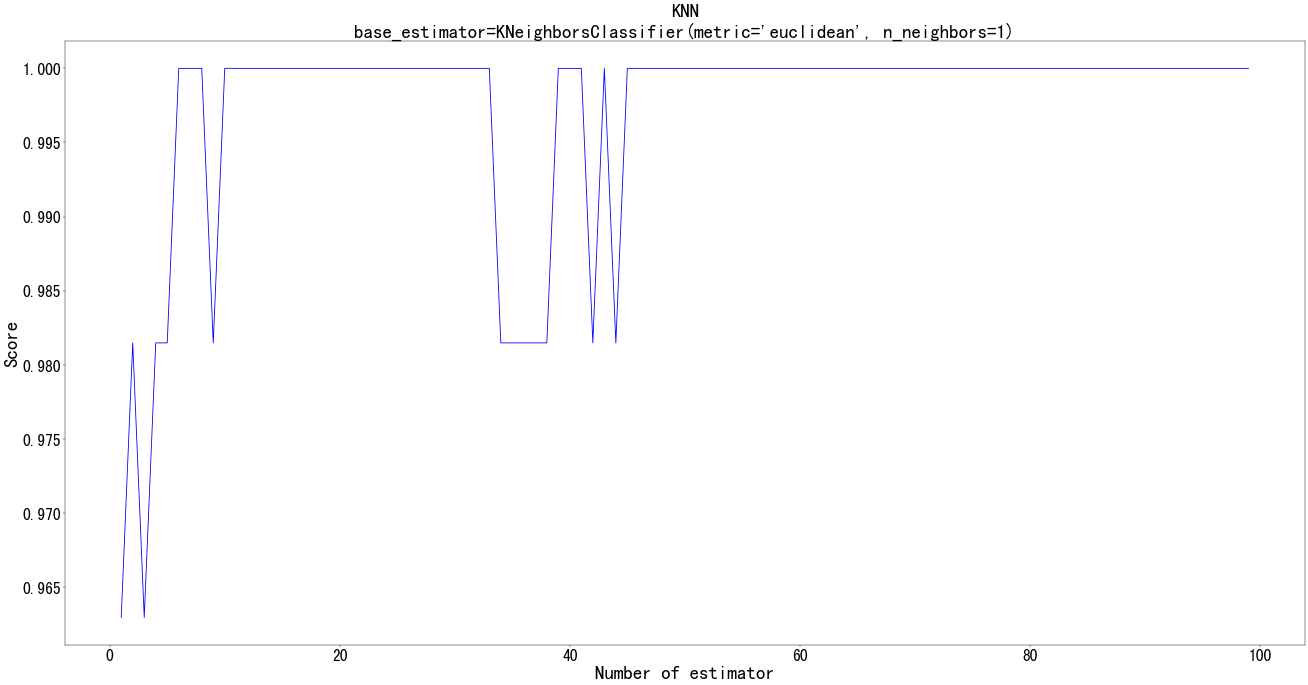

In [124]:
# KNN
# 先通过网格搜索找到最佳参数
para_grid = {
    'n_neighbors': range(1, 20),
    'metric': ('euclidean', 'manhattan', 'chebyshev', 'minkowski')
}
estimator = KNeighborsClassifier()
estimator = GridSearchCV(estimator=estimator, param_grid=para_grid, cv=10)
estimator = estimator.fit(X=x_train, y=y_train).best_estimator_
print('Best estimator in KNN: ', estimator)
print('Predict score in KNN:', estimator.score(X=x_test, y=y_test))
plot_bagging_ensemble(base_estimator=estimator,
              max_num_estimator=100,
              x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test,
              title=f'KNN\nbase_estimator={estimator}')

Estimator in Naive Bayes:  MultinomialNB()
Predict score in Naive Bayes: 0.6296296296296297
Best score in ensemble with bagging:  0.6481481481481481


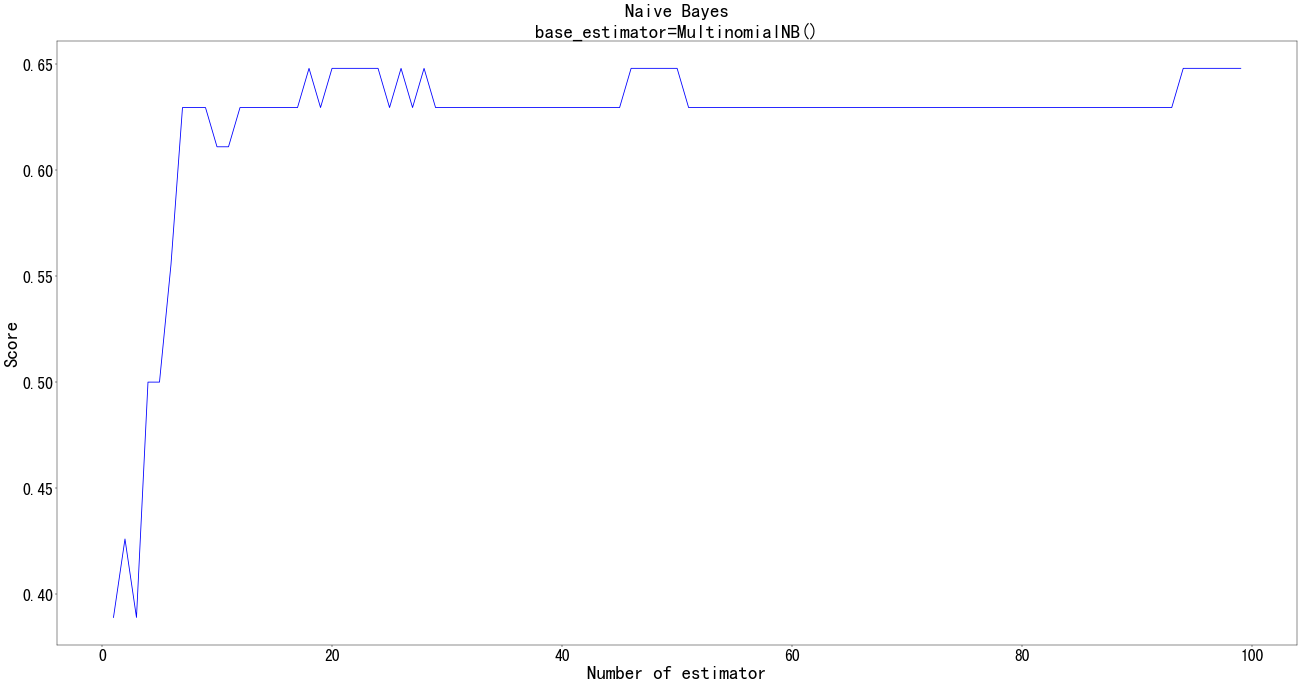

In [129]:
# Naive Bayes
# 标准化
# transfer = MinMaxScaler(feature_range=(0, 1))  # 【重点】朴素贝叶斯中特征值不能为负数
# x_train = transfer.fit_transform(X=x_train)
# x_test = transfer.transform(X=x_test)

estimator = MultinomialNB()
estimator = estimator.fit(X=x_train, y=y_train)  # 【重点】朴素贝叶斯中特征值不能为负数
print('Estimator in Naive Bayes: ', estimator)
print('Predict score in Naive Bayes:', estimator.score(X=x_test, y=y_test))
plot_bagging_ensemble(base_estimator=estimator,
              max_num_estimator=100,
              x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test,
              title=f'Naive Bayes\nbase_estimator={estimator}')

Best estimator in Decision tree:  DecisionTreeClassifier(max_depth=5, random_state=90102)
Predict score in Decision tree: 0.9074074074074074
Best score in ensemble with bagging:  0.9444444444444444


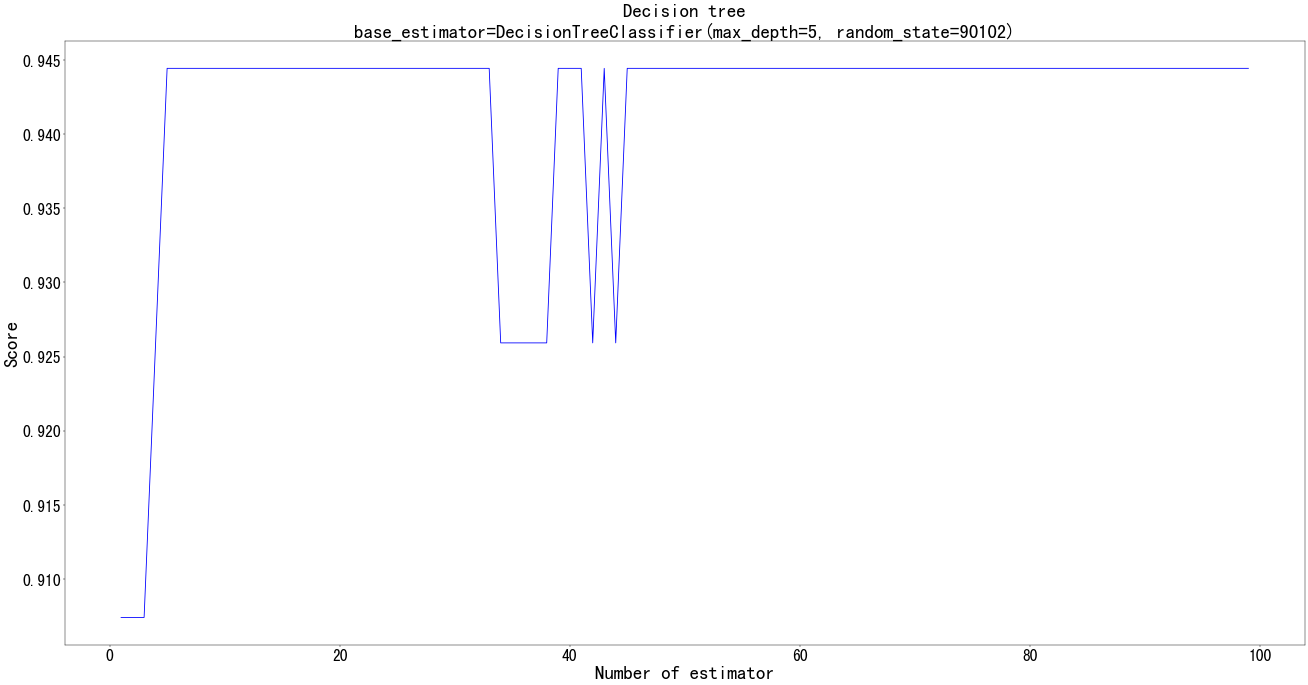

In [130]:
# Decision tree
para_grid = {
    'max_depth': range(2, 30),
    'min_samples_split': range(1, 10)
}
estimator = DecisionTreeClassifier(random_state=90102)
estimator = GridSearchCV(estimator=estimator, param_grid=para_grid, cv=10)
estimator = estimator.fit(X=x_train, y=y_train).best_estimator_
print('Best estimator in Decision tree: ', estimator)
print('Predict score in Decision tree:', estimator.score(X=x_test, y=y_test))
plot_bagging_ensemble(base_estimator=estimator,
              max_num_estimator=100,
              x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test,
              title=f'Decision tree\nbase_estimator={estimator}')

Best estimator in SVC:  SVC(C=10, degree=1, kernel='poly', random_state=90102)
Predict score in SVC: 0.9259259259259259


Best score in ensemble with bagging:  0.9259259259259259


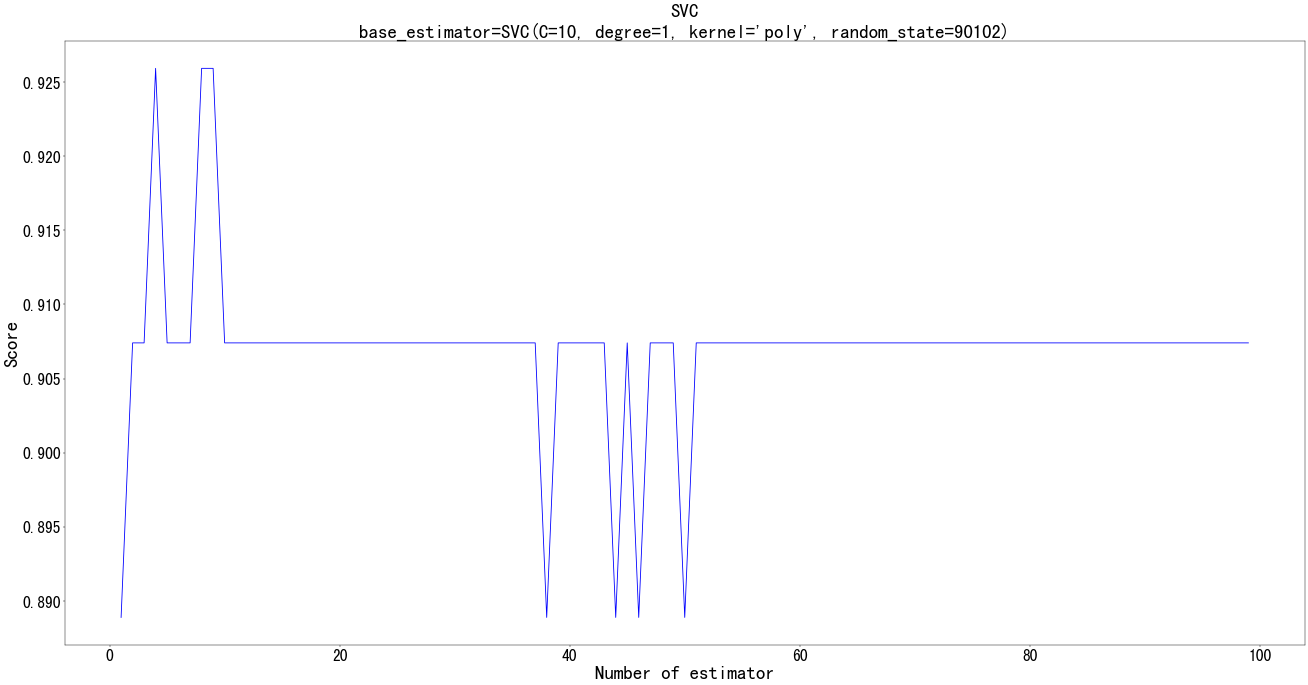

In [131]:
# SVM 支持向量机
para_grid = {
    'C': range(1, 100),
    'kernel': ('RBF', 'poly', 'linear', 'sigmodi'),
    'degree': range(1, 10)
}
estimator = SVC(random_state=90102)
estimator = GridSearchCV(estimator=estimator, param_grid=para_grid, cv=10)
estimator = estimator.fit(X=x_train, y=y_train).best_estimator_
print('Best estimator in SVC: ', estimator)
print('Predict score in SVC:', estimator.score(X=x_test, y=y_test))
plot_bagging_ensemble(base_estimator=estimator,
              max_num_estimator=100,
              x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test,
              title=f'SVC\nbase_estimator={estimator}')

## Задание 2

Исследуйте зависимость качества классификации от количества классификаторов в ансамбле для алгоритма бустинга (например, AdaBoost) на наборе данных vehicle.csv с различными базовыми классификаторами. Постройте графики зависимости качества классификации при различном числе классификаторов, объясните полученные результаты

研究在具有不同基础分类器的vehicle.csv数据集上，提升算法（如AdaBoost）的分类质量对集合中分类器数量的依赖性。绘制不同数量分类器的分类质量的依赖关系，解释结果

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


def plot_adaboost_ensemble(base_estimator, max_num_estimator, x_train, x_test, y_train, y_test, title):
    """绘制分类器数量和预测得分的关系图"""
    arr_score = []
    arr_num_tesimator = range(1, max_num_estimator)
    for i in arr_num_tesimator:
        print(i)
        ensemble_estimator = AdaBoostClassifier(base_estimator=base_estimator,
                                                n_estimators=i,
                                                learning_rate=1.0,
                                                algorithm='SAMME.R',
                                                random_state=90102)
        ensemble_estimator.fit(X=x_train, y=y_train)
        score = ensemble_estimator.score(X=x_test, y=y_test)
        arr_score.append(score)

    print('Best score in ensemble with AdaBoost: ', max(arr_score))
    plt.figure(figsize=(40, 20), dpi=40)
    plt.plot(arr_num_tesimator, arr_score, c='r')
    plt.title(title, size=34)
    plt.xlabel('Number of estimator', size=34)
    plt.ylabel('Score', size=34)
    plt.tick_params(labelsize=28)
    plt.show()
    pass


data = pd.read_csv('vehicle.csv')
transfer = LabelEncoder()
data['Class'] = transfer.fit_transform(y=data['Class'])
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data.iloc[:, -1:], random_state=90102)

KNN

由于 KNN 算法没有 sample_weight，所以不能使用 AdaBoot 进行！！！

KNeighborsClassifier doesn't support sample_weight.

Estimator in Naive Bayes:  GaussianNB()
Predict score in Naive Bayes: 0.41037735849056606
Best score in ensemble with AdaBoost:  0.7641509433962265


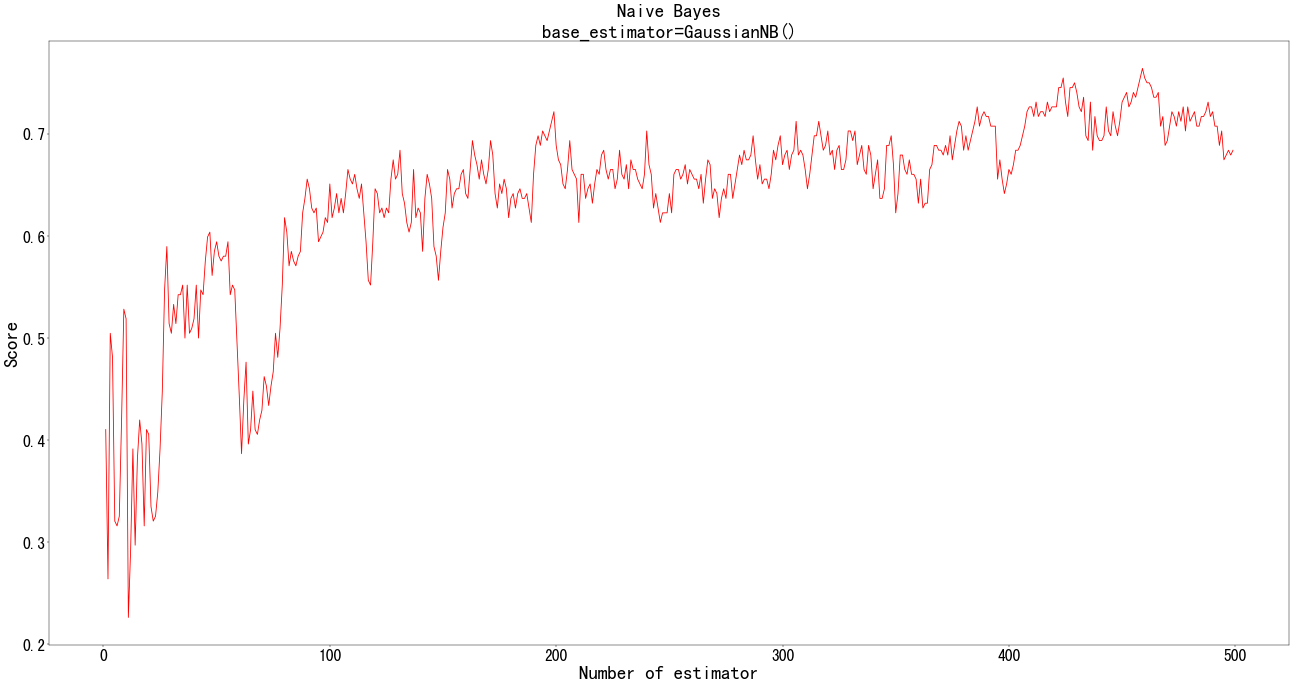

In [133]:
# Naive Bayes
estimator = GaussianNB()
estimator = estimator.fit(X=x_train, y=y_train)  # 【重点】朴素贝叶斯中特征值不能为负数
print('Estimator in Naive Bayes: ', estimator)
print('Predict score in Naive Bayes:', estimator.score(X=x_test, y=y_test))
plot_adaboost_ensemble(base_estimator=estimator,
                       max_num_estimator=500,
                       x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test,
                       title=f'Naive Bayes\nbase_estimator={estimator}')

Best estimator in Decision tree:  DecisionTreeClassifier(max_depth=8, random_state=90102)
Predict score in Decision tree: 0.6886792452830188
Best score in ensemble with AdaBoost:  0.8207547169811321


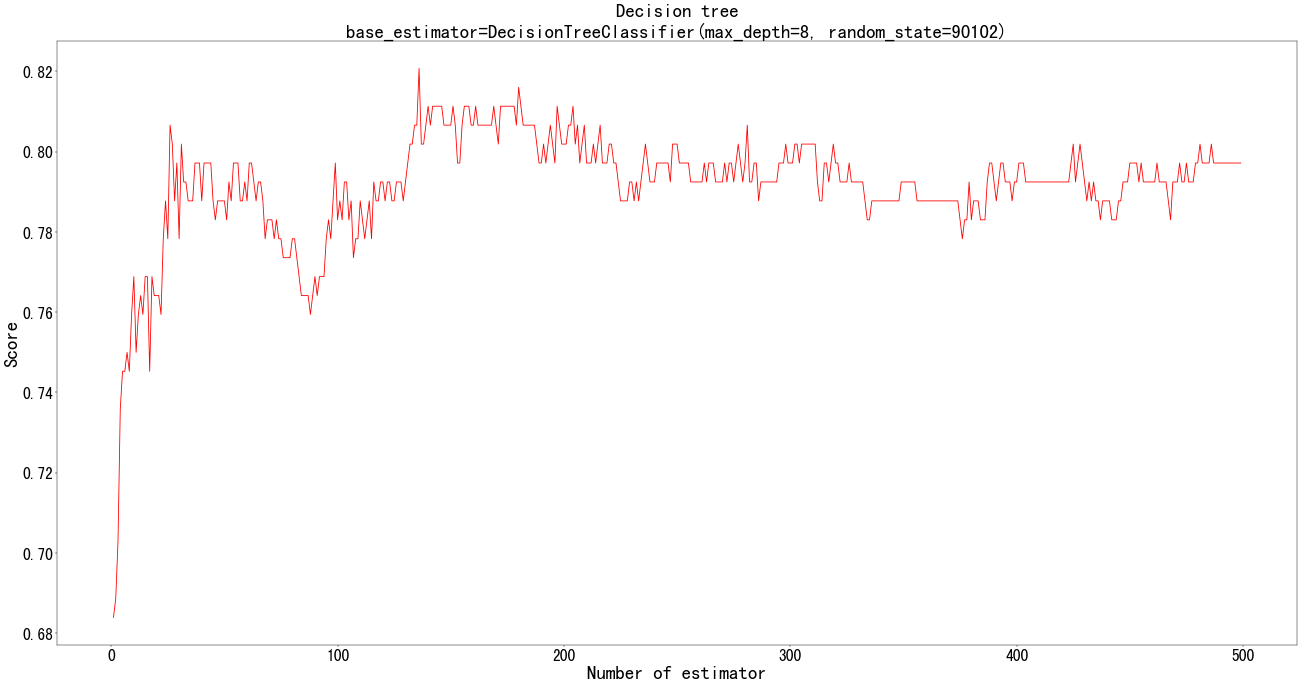

In [135]:
# Decision tree
para_grid = {
    'max_depth': range(2, 30),
    'min_samples_split': range(1, 10)
}
estimator = DecisionTreeClassifier(random_state=90102)
estimator = GridSearchCV(estimator=estimator, param_grid=para_grid, cv=10)
estimator = estimator.fit(X=x_train, y=y_train).best_estimator_
print('Best estimator in Decision tree: ', estimator)
print('Predict score in Decision tree:', estimator.score(X=x_test, y=y_test))
plot_adaboost_ensemble(base_estimator=estimator,
              max_num_estimator=500,
              x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test,
              title=f'Decision tree\nbase_estimator={estimator}')

In [138]:
# SVM 支持向量机
para_grid = {
    'C': range(1, 100),
    'kernel': ('RBF', 'poly', 'linear', 'sigmodi'),
    'degree': range(1, 5)
}
estimator = SVC(random_state=90102)
estimator = GridSearchCV(estimator=estimator, param_grid=para_grid, cv=10)
estimator = estimator.fit(X=x_train, y=y_train).best_estimator_
print('Best estimator in SVC: ', estimator)
print('Predict score in SVC:', estimator.score(X=x_test, y=y_test))
plot_adaboost_ensemble(base_estimator=estimator,
              max_num_estimator=500,
              x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test,
              title=f'SVC\nbase_estimator={estimator}')

## Задание 3

Постройте мета-классификатор для набора данных titanic_train.csv используя стекинг и оцените качество классификации на titanic_train.csv

使用堆叠法为titanic_train.csv数据集建立元分类器，并评估titanic_train.csv的分类质量